### **Importing Required Libraries**

In [1849]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
import os

### **Loading Data From CSV Using Pandas Library**

In [1850]:
data_frame = pd.read_csv(r'C:\Users\14089\Desktop\NILAY JAIN\Personal Projects\Play_Song_By_Mood\Extra Stuff\data_moods.csv')

data_frame.head(6)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,...,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,"mean(d,e,v)",mood_final
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,10/27/1982,68.0,379266.0,0.866,0.13700,0.7300,...,0.0843,0.625,-8.201,0.0767,118.523,5.0,4.0,Happy,0.740333,Pop Chill
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,4/16/2007,43.0,318800.0,0.381,0.01890,0.8320,...,0.1530,0.166,-5.069,0.0492,120.255,8.0,4.0,Happy,0.459667,Chill
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,11/6/2006,60.0,217946.0,0.346,0.91300,0.1390,...,0.0934,0.116,-15.326,0.0321,136.168,0.0,4.0,Sad,0.200333,Lofi
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,8/21/1984,2.0,233000.0,0.466,0.08900,0.4380,...,0.1130,0.587,-12.858,0.0608,193.100,4.0,4.0,Happy,0.497000,Chill
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,1/1/2004,60.0,268000.0,0.419,0.00171,0.9320,...,0.1370,0.445,-3.604,0.1060,169.881,1.0,4.0,Happy,0.598667,Pop Chill
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,7/31/2020,27.0,129410.0,0.394,0.99500,0.0475,...,0.1050,0.172,-26.432,0.0720,71.241,6.0,5.0,Sad,0.204500,Lofi


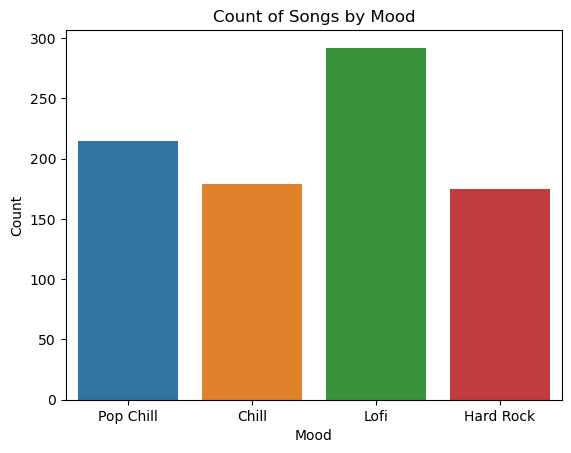

In [1851]:
sns.countplot(x='mood_final', data=data_frame)

# Add labels and show the plot
plt.xlabel('Mood')
plt.ylabel('Count')
plt.title('Count of Songs by Mood')
plt.show()

### **Scaling/Normalizing The Data Frame To Remove Exploding Values**

In [1852]:
# scaling the "key" column b/w -1 to +1
data_frame['key'] = data_frame['key'] / max(data_frame['key'])

# scaling the "loudness" column b/w -1 to +1
data_frame['loudness'] = data_frame['loudness'] / min(data_frame['loudness'])

# scaling the "duration_ms" column b/w -1 to +1
data_frame['length'] = data_frame['length'] / max(data_frame['length'])

# scaling the "time_signature" column b/w -1 to +1
data_frame['time_signature'] = data_frame['time_signature'] / max(data_frame['time_signature'])

# # labeling the mood as 0 or 1 for easy calculation and prediction
data_frame['mood_final'] = data_frame['mood_final'].map({'Pop Chill': 0, 'Chill': 1, 'Lofi':2, 'Hard Rock':3})

# scaling the "popularity" column b/w -1 to +1
data_frame['popularity'] = data_frame['popularity'] / max(data_frame['popularity'])

# scaling the "tempo" column b/w -1 to +1
data_frame['tempo'] = data_frame['tempo'] / max(data_frame['tempo'])

### **Visualizing Data Frame After Normalized Data**

In [1853]:
data_frame.head(10)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,...,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood,"mean(d,e,v)",mood_final
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,10/27/1982,0.772727,0.731647,0.866,0.137000,0.7300,...,0.0843,0.625,0.195178,0.0767,0.543808,0.454545,0.8,Happy,0.740333,0
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,4/16/2007,0.488636,0.615001,0.381,0.018900,0.8320,...,0.1530,0.166,0.120639,0.0492,0.551755,0.727273,0.8,Happy,0.459667,1
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,11/6/2006,0.681818,0.420442,0.346,0.913000,0.1390,...,0.0934,0.116,0.364748,0.0321,0.624767,0.000000,0.8,Sad,0.200333,2
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,8/21/1984,0.022727,0.449483,0.466,0.089000,0.4380,...,0.1130,0.587,0.306012,0.0608,0.885983,0.363636,0.8,Happy,0.497000,1
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,1/1/2004,0.681818,0.517002,0.419,0.001710,0.9320,...,0.1370,0.445,0.085773,0.1060,0.779449,0.090909,0.8,Happy,0.598667,0
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,7/31/2020,0.306818,0.249646,0.394,0.995000,0.0475,...,0.1050,0.172,0.629064,0.0720,0.326869,0.545455,1.0,Sad,0.204500,2
6,A La Plage,A La Plage,Ron Adelaar,79NmiFAgcXUIVDGfCWDdWF,8/7/2020,0.329545,0.273718,0.504,0.994000,0.0584,...,0.1150,0.553,0.486958,0.0516,0.615779,0.454545,0.8,Sad,0.371800,1
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,12/28/2009,0.011364,0.407377,0.586,0.000155,0.9350,...,0.1590,0.580,0.223380,0.0482,0.527630,0.363636,0.8,Happy,0.700333,3
8,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park,5rAxhWcgFng3s570sGO2F8,10/24/2000,0.772727,0.356191,0.603,0.014400,0.9080,...,0.6710,0.457,0.125042,0.1840,0.610521,1.000000,0.8,Happy,0.656000,3
9,ATTACK,A Beautiful Lie + 30 Seconds To Mars,Thirty Seconds To Mars,6QxTWEvzcJljVZaeTzuHF1,5/15/2007,0.000000,0.364988,0.331,0.003440,0.8760,...,0.7320,0.299,0.045076,0.0603,0.802978,0.454545,0.8,Happy,0.502000,0


### **Splitting The Data Frame In X and y. i.e., Training and Test Data**

In [1854]:
# determining the features and the target values.

#"acousticness", "liveness", "loudness", "speechiness", "tempo", "key", "time_signature", "danceability", "energy", "valence"
X = np.array(data_frame.drop(columns=["mood", "mean(d,e,v)", "mood_final", "name", "album", "artist", "id", "release_date", "popularity", "length", "instrumentalness", "time_signature", "key"]))
y = np.array(data_frame["mood_final"])

# splitting the dataset into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [1855]:
X_train.shape

(688, 8)

### **Plotting The Values For Better Visualization**

In [ ]:
plt.scatter(data_frame['danceability'], data_frame['mood_final'])

In [ ]:
plt.scatter(data_frame['energy'], data_frame['mood_final'])

In [ ]:
plt.scatter(data_frame['valence'], data_frame['mood_final'])

In [ ]:
X_train.shape

### **Designing The Model Architechture**

#### **Architecture 1: (Neural Network From Scratch)**

##### **Importing Required Libraries**

In [1857]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
opt = Adam(learning_rate=0.001)
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

##### **Creating Model Architecture & Model Fitting**

In [1858]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(8, )))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="sigmoid"))

In [1859]:
# model.compile(optimizer='adam', loss="sparcecategorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=optimizers.Adam(), loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [1860]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split=0.2,
    epochs = 100,
    batch_size = 32
)

Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 2.6781 - accuracy: 0.4764 - val_loss: 2.2647 - val_accuracy: 0.5362
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 1.9258 - accuracy: 0.6273 - val_loss: 1.6999 - val_accuracy: 0.6159
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 1.4658 - accuracy: 0.6927 - val_loss: 1.3284 - val_accuracy: 0.6522
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 1.1549 - accuracy: 0.7509 - val_loss: 1.0065 - val_accuracy: 0.7971
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 0.9353 - accuracy: 0.7836 - val_loss: 0.8863 - val_accuracy: 0.7899
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.8163 - accuracy: 0.7836 - val_loss: 0.7516 - val_accuracy: 0.8333
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7125 - accuracy: 0.8200 - val_loss: 0.6600 - val_accuracy: 0.8406
Epoch 8/100

##### **Evaluating & Printing Accuracy**

In [1861]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

6/6 [==============================] - 0s 4ms/step - loss: 0.1707 - accuracy: 0.9480
Test Loss: 0.17073552310466766
Test Accuracy: 0.9479768872261047


In [1862]:
X_train.shape

(688, 8)

In [1863]:
sample_X_test = np.array([[ 1.68000e-01,  6.81000e-01,  2.35000e-01,  8.90000e-02,
        7.91000e-02, -1.74620e+01,  3.89000e-02,  1.09098e+02]])
sample_X_test.shape

(1, 8)

In [1864]:
# Reverse mapping dictionary
reverse_mapping = {0: 'Pop Chill', 1: 'Chill', 2: 'Lofi', 3: 'Hard Rock'}

# Make predictions on new data
predictions = model.predict(sample_X_test)

# If you have a classification task and you want to get the class labels instead of probabilities
# Get the class labels with the highest probability for each prediction
predicted_classes = predictions.argmax(axis=1)

# If you have a regression task, you can directly use the predictions as they are continuous values

# Print the predicted classes (if applicable)
print("Predicted Classes:", predicted_classes)

1/1 [==============================] - 0s 73ms/step
Predicted Classes: [0]


#### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

In [ ]:
predictions = model_rfc.predict(X_test)
accuracy = accuracy_score(predictions, y_test)

In [ ]:
predictions

In [ ]:
accuracy

#### **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

In [ ]:
predictions = model_dtc.predict(X_test)
accuracy = accuracy_score(predictions, y_test)

In [ ]:
predictions

In [ ]:
accuracy

#### **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
predictions = model_knn.predict(X_test)
accuracy = accuracy_score(predictions, y_test)

In [ ]:
predictions

In [ ]:
accuracy

### **Saving The Model For Future Use**

### **Checking The Results**